# IMPORTS


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data

In [2]:
df=pd.read_csv(r"C:\Users\olona\Downloads\DATA SCIENCE\jose portilla\Personal projects Data\KAG_conversion_data.csv")
df

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.430000,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.820000,2,0
2,708771,916,103920,30-34,M,20,693,0,0.000000,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.250000,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.189997,13,2
1139,1314411,1178,179978,45-49,F,110,637549,120,173.880003,3,0
1140,1314412,1178,179979,45-49,F,111,151531,28,40.289999,2,0
1141,1314414,1178,179981,45-49,F,113,790253,135,198.710000,8,2


***
***
***

# Exploratory data analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [4]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [5]:
df['Approved_Conversion'].unique()

array([ 1,  0,  3,  2, 14,  5, 10, 17, 21,  4,  9,  7,  8, 12,  6, 13],
      dtype=int64)

<AxesSubplot:>

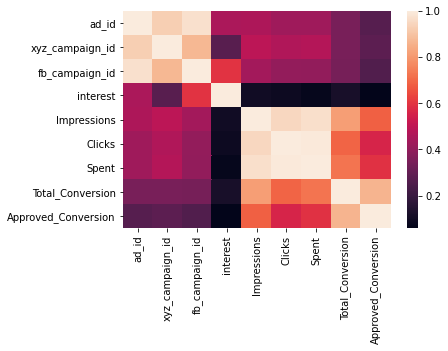

In [6]:
sns.heatmap(df.corr())

In [7]:
df.corr()['Approved_Conversion'].sort_values()

interest               0.058353
fb_campaign_id         0.257658
ad_id                  0.271331
xyz_campaign_id        0.284968
Clicks                 0.559526
Spent                  0.593178
Impressions            0.684249
Total_Conversion       0.864034
Approved_Conversion    1.000000
Name: Approved_Conversion, dtype: float64

<AxesSubplot:xlabel='Total_Conversion', ylabel='Approved_Conversion'>

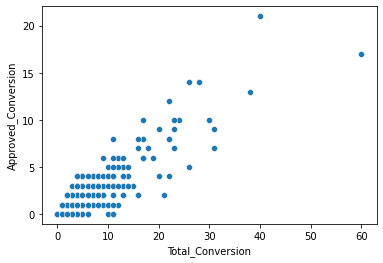

In [8]:
#total_conversion
sns.scatterplot(x='Total_Conversion',y='Approved_Conversion',data=df)
#the more people enquired about the product, the more they bought it 

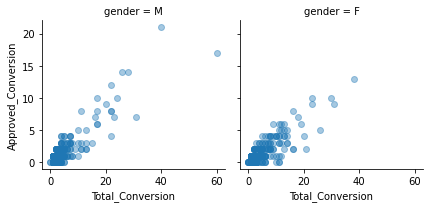

In [9]:
#Let us explore this with the two different genders
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion", alpha=.4)
g.add_legend();
#Males tend to buy more products after enquiring about it


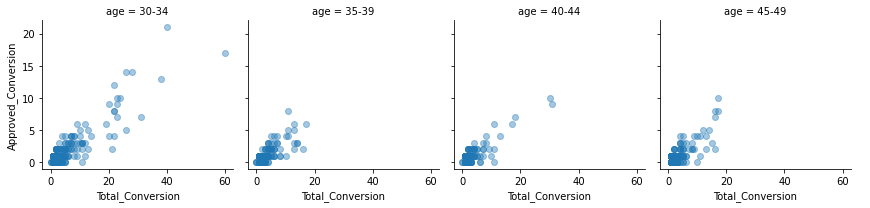

In [10]:
#Let us explore this with the different age ranges
g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion", alpha=.4)
g.add_legend();
#Ages between 30-34 tend to buy more after enquiring about the product

<AxesSubplot:xlabel='Spent', ylabel='Approved_Conversion'>

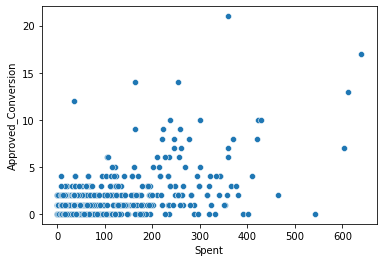

In [11]:
#spent
sns.scatterplot(x='Spent',y='Approved_Conversion',data=df)
#there is no clear linear relationship between the amount spent and approved conversion

In [12]:
# Convert to String because these features are categorical
df['interest'] = df['interest'].apply(str)
df['xyz_campaign_id']=df['xyz_campaign_id'].apply(str)
df['xyz_campaign_id'].unique()

array(['916', '936', '1178'], dtype=object)

# Campaign

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='count'>

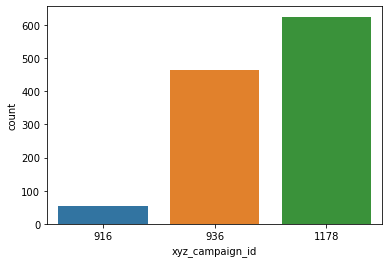

In [50]:
#let us check the campaign that ran the most ads
sns.countplot(data=df, x='xyz_campaign_id')

Text(0.5, 1.0, 'Campaigns vs Conversion')

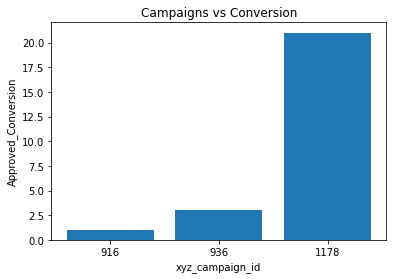

In [15]:

#Let us see what campaign has the most approved conversions. Of course, we expect campaign '1178' to be more as it is the most run
plt.bar(df["xyz_campaign_id"], df["Approved_Conversion"])
plt.ylabel('Approved_Conversion')
plt.xlabel('xyz_campaign_id')
plt.title('Campaigns vs Conversion')
##campaign 1178 yields more conversions as expected. 

### campaign 1178 yields more conversions as expected. 

***

# Age

In [16]:
#Age


df['age'].value_counts()

30-34    426
45-49    259
35-39    248
40-44    210
Name: age, dtype: int64

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

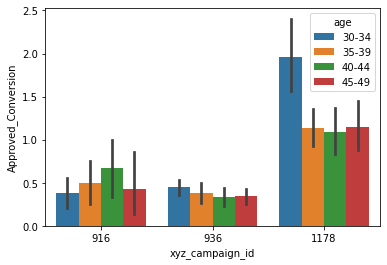

In [17]:
#let us see the age distribution with individual campaigns versus approved conversion
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["age"], data=df)


#### 1. adults between ages 30 and 24 are most represented in terms of the audience
#### 2. We can deduce that campaign 1178 is most approved by adults between ages 30-34. Campaign 916 has a different distribution as it is mostly approved by adults between ages 40-44

***

# Gender

<AxesSubplot:xlabel='xyz_campaign_id', ylabel='Approved_Conversion'>

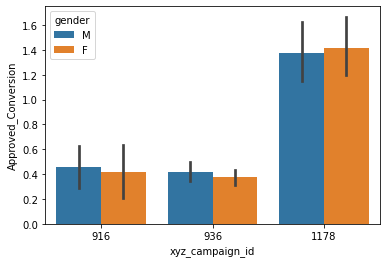

In [18]:
#gender
sns.barplot(x=df["xyz_campaign_id"], y=df["Approved_Conversion"], hue=df["gender"], data=df)
#Approved conversions between each gender is negligible. There is an almost equal distribution

***

# Interest

<AxesSubplot:xlabel='interest', ylabel='Approved_Conversion'>

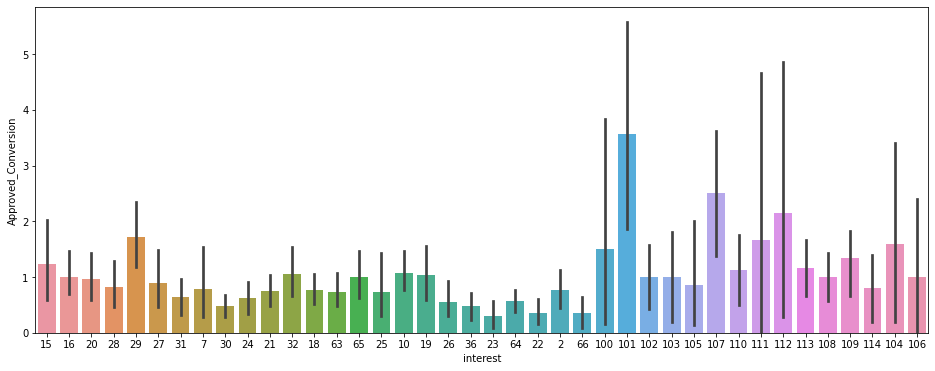

In [51]:

df['interest'].unique()
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(data=df, x="interest", y="Approved_Conversion")


#### 1. people with interest in the category code of 101 are the most approved conversion



***

# Impressions

<AxesSubplot:xlabel='Impressions', ylabel='Approved_Conversion'>

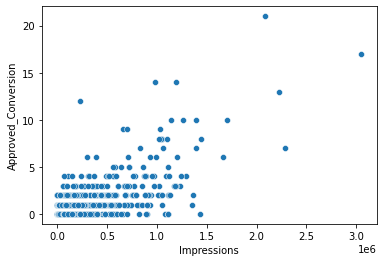

In [20]:

sns.scatterplot(data=df, x='Impressions',y='Approved_Conversion')


#### 1.There is a subtle linear trend. But a lot of outliers and not really enough to deduce a relationship between the number of times the ad was shown and the approved conversion 

***

# CLICKS

<AxesSubplot:xlabel='Clicks', ylabel='Approved_Conversion'>

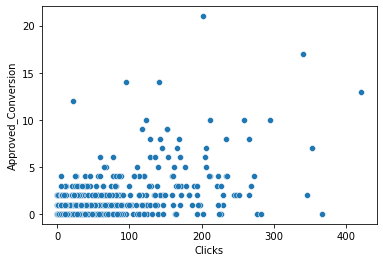

In [21]:
#Let us explore the relationship between clicking the ad and buying the product
sns.scatterplot(data=df, x='Clicks',y='Approved_Conversion')

<AxesSubplot:xlabel='Impressions', ylabel='Clicks'>

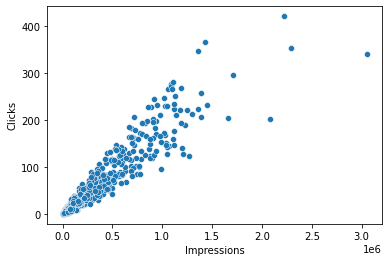

In [22]:
sns.scatterplot(data=df, x='Impressions',y='Clicks')
#While there is no clear correlation between clicks and people buying the product, it is interesting to note that number of times the ad was shown is proportionate to the number of clicks
#And that weirdly does not vastly affect the conversion. Perhaps it is more about the quality of the ad than the number of times it was played.
#That is why in the above scatterplot an ad clicked 200 times has higher conversion rate than an ad clicked400 times

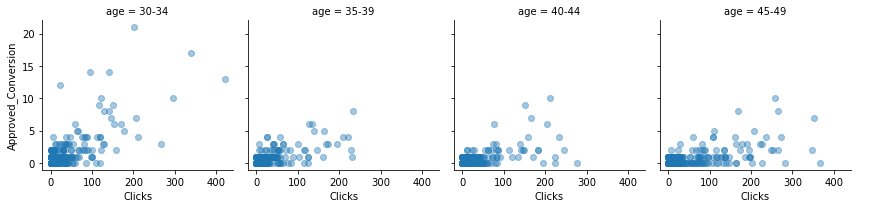

In [23]:
#Let us see age range that buys the product after clicking the ad

g = sns.FacetGrid(df, col="age")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
g.add_legend();

#people between the ages of 30-34 tend to buy more after clicking more

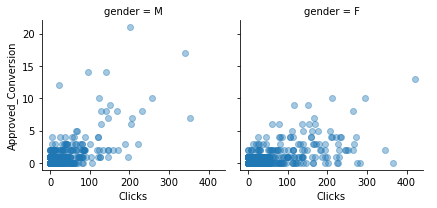

In [24]:
#let us see the distribution with gender
g = sns.FacetGrid(df, col="gender")
g.map(plt.scatter, "Clicks", "Approved_Conversion", alpha=.4)
g.add_legend();

#men tend to buy more products after clicking on the ad than women

#### 1. While there is no clear correlation between clicks and people buying the product, it is interesting to note that number of times the ad was shown is proportionate to the number of clicks and that weirdly does not vastly affect the conversion. Perhaps it is more about the quality of the ad than the number of times it was played. That is why in the scatterplot that shows clicks versus conversion an ad clicked 200 times has higher conversion rate than an ad clicked400 times
#### 2. people between the ages of 30-34 tend to buy more after clicking more
#### 3. men tend to buy more products after clicking on the ad than women

***

# Campaign 1178 (fixating on the most run campaign)

In [25]:
#Let us explore more on campaign 1178 which is the most run campaign and the one with most conversion
# 
a=[]
b=[]
c=[]
for i,j,k in zip(df.xyz_campaign_id, df.fb_campaign_id, df.Approved_Conversion):
    if i=="1178":
      a.append(i),b.append(j),c.append(k)

In [26]:
# Creating a dataframe for the most run campaign and the facebook_campaign ids with their conversions
campaign_1178={'campaign_1178':a, 'fb_campaign_id':b, 'Approved_Conversion':c}     
campaign_1178=pd.DataFrame(campaign_1178)
campaign_1178


,campaign_1178,fb_campaign_id,Approved_Conversion
0,1178,144531,14
1,1178,144531,5
2,1178,144531,1
3,1178,144531,2
4,1178,144531,2
...,...,...,...
620,1178,179977,2
621,1178,179978,0
622,1178,179979,0
623,1178,179981,2


C:\Users\olona\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'fb_campaign_id vs. Approved_Conversion for campaign_c')

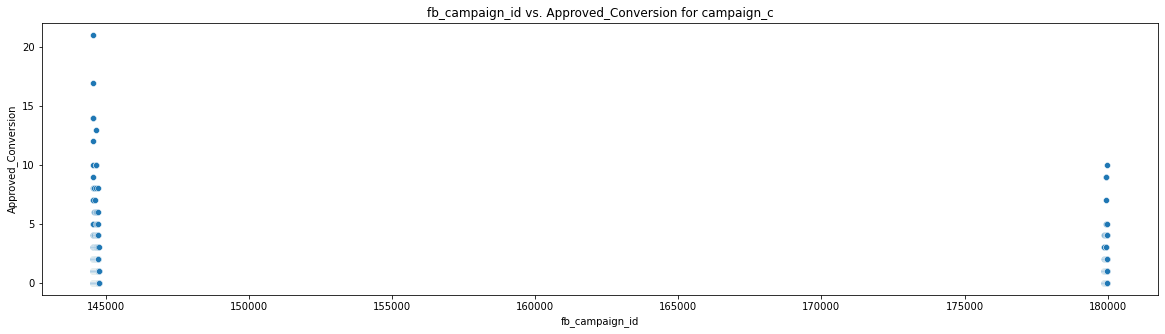

In [27]:
#Visualize relationship between facebook campaign id and approved conversion for campaign 1178
plt.figure(figsize=(20,5))
sns.scatterplot(campaign_1178["fb_campaign_id"], campaign_1178["Approved_Conversion"])
plt.title("fb_campaign_id vs. Approved_Conversion for campaign_c")
#We can see that smaller id numbers (likely earlier ads) have more conversions than larger id numbers  


#### We can see that smaller id numbers (likely earlier ads) have more conversions than larger id numbers. Maybe the company was not inventive with new ads and earlier ads were more captivating

***

***

# One hot  encoding

In [28]:
#We do one hot encoding to make sure categorical data can fit into our model
df.select_dtypes(include='object')

,xyz_campaign_id,age,gender,interest
0,916,30-34,M,15
1,916,30-34,M,16
2,916,30-34,M,20
3,916,30-34,M,28
4,916,30-34,M,28
...,...,...,...,...
1138,1178,45-49,F,109
1139,1178,45-49,F,110
1140,1178,45-49,F,111
1141,1178,45-49,F,113


In [29]:
df_objs = df.select_dtypes(include='object')
df_nums = df.select_dtypes(exclude='object')
df_nums.drop(['ad_id','fb_campaign_id'], axis=1, inplace = True)
df_objs = pd.get_dummies(df_objs,drop_first=True)
final_df = pd.concat([df_nums,df_objs],axis=1)
final_df

C:\Users\olona\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,xyz_campaign_id_916,xyz_campaign_id_936,age_35-39,age_40-44,age_45-49,...,interest_29,interest_30,interest_31,interest_32,interest_36,interest_63,interest_64,interest_65,interest_66,interest_7
0,7350,1,1.430000,2,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,17861,2,1.820000,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,693,0,0.000000,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4259,1,1.250000,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4133,1,1.290000,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1129773,252,358.189997,13,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1139,637549,120,173.880003,3,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1140,151531,28,40.289999,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1141,790253,135,198.710000,8,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Linear regression

In [30]:
X = final_df.drop('Approved_Conversion',axis=1)
y = final_df['Approved_Conversion']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [33]:
from sklearn.linear_model import ElasticNet
base_elastic_model = ElasticNet()

In [34]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

In [37]:
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:    5.0s finished


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [38]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 0.5}

In [39]:
y_pred = grid_model.predict(scaled_X_test)

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [41]:
mean_absolute_error(y_test,y_pred)

0.7035036781846963

In [49]:
mean_squared_error(y_test,y_pred)

0.8396939151957964

In [42]:
np.sqrt(mean_squared_error(y_test,y_pred))

0.916348140826289

In [43]:
np.mean(df['Approved_Conversion'])

0.9440069991251093

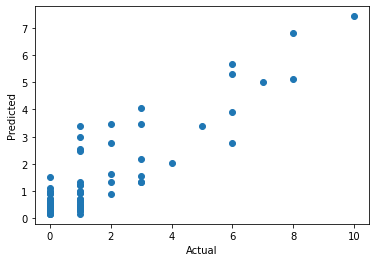

In [44]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [45]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
284,0,1.012874,-1.012874
448,0,0.402737,-0.402737
842,1,1.242393,-0.242393
36,1,0.325953,0.674047
927,1,0.327354,0.672646
...,...,...,...
1107,5,3.382500,1.617500
584,1,2.538161,-1.538161
179,0,0.163689,-0.163689
779,1,0.403929,0.596071


In [52]:
np.mean(pred_df['Difference'])

0.07111786911362525

#### The root mean square error is very close to the  average of the approved conversion feature. 
#### This model can predict new data quite accurately.
#### The avearage difference in prediction is not significant too.